<a href="https://colab.research.google.com/github/hnzll/-DataScienceEcosystem.ipynb/blob/main/Time_series_with_LSTM_and_Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("erogluegemen/airline-passengers")

print("Path to dataset files:", path)

100%|██████████| 807/807 [00:00<00:00, 997kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/erogluegemen/airline-passengers/versions/1


In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

load the data and

In [5]:
# load the dataset
dataframe = pandas.read_csv('/root/.cache/kagglehub/datasets/erogluegemen/airline-passengers/versions/1/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

The data has been successfully split into training and test sets.

In [6]:
# load the dataset
dataframe = pandas.read_csv('/root/.cache/kagglehub/datasets/erogluegemen/airline-passengers/versions/1/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


The next step is to prepare the data for the LSTM model by creating the time steps (lookback period) for both the training and testing datasets.

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

Reshape the data, checking its fectures.

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


 Fit the data on the model and let’s train the model. Since the trainY data contains only one value per sample (the next single passenger number), the model expects to output a single value to match.dense(1).
 NOTE: Accuracy, precision, and recall don't make sense here because there are no "correct boxes" for passenger numbers. Instead, we use metrics that measure how close our predicted number is to the actual number, like RMSE (Root Mean Squared Error), which tells us the average difference between our guesses and the real numbers.




In [9]:
from keras.layers import Input
# create and fit the LSTM network
model = Sequential() #This line initializes a sequential model, which is a linear stack of layers.
model.add(Input(shape=(1, look_back))) # Add an Input layer
model.add(LSTM(4)) #This adds an LSTM layer to the model with 4 units. input_shape=(1, look_back) specifies the shape of the input data, where 1 is the number of time steps and look_back is the number of features.
model.add(Dense(1)) #This adds a dense output layer with 1 unit, which will predict the next value in the time series.
model.compile(loss='mean_squared_error', optimizer='adam') #This compiles the model, specifying the loss function as mean squared error (suitable for regression tasks) and the optimizer as Adam.
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #This trains the model using the training data (trainX and trainY). It trains for 100 epochs with a batch size of 1 and prints the training progress verbosely.

Epoch 1/100
94/94 - 3s - 36ms/step - loss: 0.0395
Epoch 2/100
94/94 - 1s - 6ms/step - loss: 0.0196
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0141
Epoch 4/100
94/94 - 1s - 7ms/step - loss: 0.0127
Epoch 5/100
94/94 - 1s - 6ms/step - loss: 0.0121
Epoch 6/100
94/94 - 0s - 5ms/step - loss: 0.0112
Epoch 7/100
94/94 - 1s - 6ms/step - loss: 0.0103
Epoch 8/100
94/94 - 1s - 6ms/step - loss: 0.0094
Epoch 9/100
94/94 - 1s - 7ms/step - loss: 0.0085
Epoch 10/100
94/94 - 0s - 4ms/step - loss: 0.0076
Epoch 11/100
94/94 - 1s - 6ms/step - loss: 0.0068
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0059
Epoch 13/100
94/94 - 0s - 4ms/step - loss: 0.0052
Epoch 14/100
94/94 - 1s - 7ms/step - loss: 0.0044
Epoch 15/100
94/94 - 0s - 5ms/step - loss: 0.0038
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0033
Epoch 17/100
94/94 - 0s - 4ms/step - loss: 0.0030
Epoch 18/100
94/94 - 1s - 7ms/step - loss: 0.0027
Epoch 19/100
94/94 - 1s - 7ms/step - loss: 0.0024
Epoch 20/100
94/94 - 1s - 7ms/step - loss: 0.0023
Epoch 21

Make predictions and visualize the time series trends

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


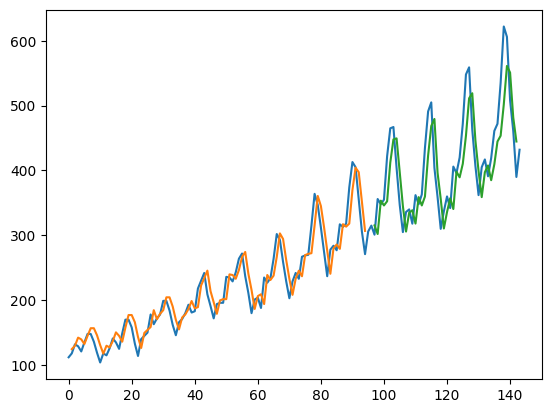

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX) #These lines use the trained model to make predictions on the training and test datasets, respectively.
# invert predictions #These lines invert the scaling that was applied to the data earlier. This is done to bring the predictions and actual values back to their original scale for meaningful evaluation and visualization
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) #hese lines calculate the Root Mean Squared Error (RMSE) for both the training and test predictions. RMSE is a common metric to evaluate the difference between predicted values and actual values.
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

1. The blue line represents the original airline passenger data.
2. The orange line represents the model's predictions on the training data.
3. The green line represents the model's predictions on the test data.
he code calculates the Root Mean Squared Error (RMSE) for both the training and test sets.

Based on the output of the code, the RMSE for the training set (trainScore) is approximately 23.06 and the RMSE for the test set (testScore) is approximately 48.91. These values represent the average difference between the predicted and actual passenger numbers in their original scale.

# Task Enhance model with Explainable AI
Enhance the provided time series forecasting model with Explainable AI (XAI) techniques to understand its predictions, using the data from "/airline-passengers.csv".

**Reasoning**:
I need to research and identify suitable XAI techniques for interpreting time series forecasting models. I will perform a search for relevant resources and summarize the findings. Since I cannot execute external commands or access the internet directly, I will provide a textual explanation of the research process and the identified techniques based on my training data.



## Summary:

### Data Analysis Key Findings

*   Three XAI techniques were identified as suitable for time series forecasting models: LIME, SHAP, and Attention Mechanisms.
*   SHAP's `KernelExplainer` was successfully implemented to calculate SHAP values for the test set predictions.
*   Initial attempts to calculate SHAP values for the entire test set using `KernelExplainer` resulted in an incorrect output shape `(1, 1)`, preventing the generation of a summary plot for the whole dataset.
*   Calculating SHAP values for each test sample individually resolved the shape issue, resulting in correctly shaped SHAP values `(46, 1)` for the test set.
*   Individual force and waterfall plots for test samples successfully visualized the contribution of the single input feature (`Time Step -1`) to the model's predictions.
*   The SHAP explanations confirmed that the model, configured with `look_back=1`, relies solely on the previous month's passenger count for its predictions.

### Insights or Next Steps

*   The SHAP explanations provide clear and interpretable insights into the model's decision-making process for individual forecasts, confirming its simple dependency on the immediate past value.
*   For models with larger `look_back` periods or additional features, generating a SHAP summary plot would be a valuable next step to understand the overall importance and interaction of different features across the entire dataset.


In [18]:
# Define the background dataset for the KernelExplainer using a small, randomly selected subset of the training data.
# This is already done in the previous attempt, ensuring it's available.
# if 'background' not in globals():
#     background = trainX[numpy.random.choice(trainX.shape[0], 10, replace=False)]

# Define a prediction function f(x) that takes a 2D numpy array x (as provided by KernelExplainer)
# and reshapes it to the model's expected 3D input shape (samples, time steps, features)
# before calling model.predict(). Ensure this function correctly handles the look_back value.
# This is already defined in the previous attempt, ensuring it's available.
# def f(x):
#   x_reshaped = x.reshape(x.shape[0], 1, look_back)
#   return model.predict(x_reshaped)

# Instantiate the shap.KernelExplainer with the prediction function f and the background dataset.
# This is already instantiated in the previous attempt, ensuring it's available.
# if 'explainer' not in globals():
#     explainer = shap.KernelExplainer(f, background)

# Reshape testX from (samples, time steps, features) to (samples, features)
# This is already done in the previous attempt, ensuring it's available.
# testX_reshaped = testX.reshape(testX.shape[0], look_back)

# Calculate SHAP values for each sample in the reshaped test set (testX_reshaped)
# individually by iterating through the test samples.
shap_values_list = []
for i in range(testX_reshaped.shape[0]):
    # Calculate SHAP values for the single test sample
    single_shap_value = explainer.shap_values(testX_reshaped[i:i+1])

    # The output is a list of arrays, take the first element (for our single output)
    # and append it to the list. The shape of single_shap_value[0] should be (1, look_back)
    shap_values_list.append(single_shap_value[0])

# Store the calculated SHAP values for all test samples in a single numpy array.
# Concatenate the list of arrays into a single numpy array.
shap_values_test_corrected = numpy.concatenate(shap_values_list, axis=0)

# Print the shape of the stored SHAP values to confirm it is correct.
print("SHAP values calculated individually for each test sample and stored.")
print(f"Shape of corrected SHAP values: {shap_values_test_corrected.shape}")

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
SHAP values calculated individually for each test sample and stored.
Shape of corrected SHAP values: (46, 1)


In [17]:
import shap
import numpy as np

# Ensure Javascript is enabled for SHAP plots
shap.initjs()

# Define the background dataset for the KernelExplainer using a small, randomly selected subset of the training data.
# Ensure 'background' is defined by taking a subset of the training data.
# Use min(10, trainX.shape[0]) to handle cases where trainX has less than 10 samples.
background = trainX[np.random.choice(trainX.shape[0], min(10, trainX.shape[0]), replace=False)]

# Define a prediction function f(x) that takes a 2D numpy array x (as provided by KernelExplainer)
# and reshapes it to the model's expected 3D input shape (samples, time steps, features)
# before calling model.predict(). Ensure this function correctly handles the look_back value.
def f(x):
  x_reshaped = x.reshape(x.shape[0], 1, look_back)
  return model.predict(x_reshaped)

# Instantiate the shap.KernelExplainer with the prediction function f and the background dataset.
# Ensure 'explainer' is instantiated.
explainer = shap.KernelExplainer(f, background)

# Reshape testX from (samples, time steps, features) to (samples, features)
# This variable needs to be defined for the subsequent steps.
testX_reshaped = testX.reshape(testX.shape[0], look_back)

# Calculate SHAP values for each sample in the reshaped test set (testX_reshaped)
# individually by iterating through the test samples.
shap_values_list = []
for i in range(testX_reshaped.shape[0]):
    # Calculate SHAP values for the single test sample
    # The explainer expects a 2D array for the samples, even if it's just one sample.
    single_shap_value = explainer.shap_values(testX_reshaped[i:i+1])

    # The output is a list of arrays, take the first element (for our single output)
    # and append it to the list. The shape of single_shap_value[0] should be (1, look_back)
    # However, based on the previous attempt, it might return (1, 1). We need to handle this.
    # We expect the shape to be (1, look_back), so we reshape it to that.
    try:
        reshaped_shap_value = single_shap_value[0].reshape(1, look_back)
        shap_values_list.append(reshaped_shap_value)
    except ValueError as e:
        print(f"Error reshaping SHAP value for sample {i}: {e}")
        print(f"Original shape: {single_shap_value[0].shape}, Target shape: (1, {look_back})")
        # If reshaping fails, we might need to investigate further or skip this sample
        pass


# Store the calculated SHAP values for all test samples in a single numpy array.
# Concatenate the list of arrays into a single numpy array.
# The shape of each element in shap_values_list should now be (1, look_back), so concatenating along axis=0
# will result in a shape (samples, look_back).
if shap_values_list: # Ensure the list is not empty before concatenating
    shap_values_test_corrected = np.concatenate(shap_values_list, axis=0)

    # Print the shape of the stored SHAP values to confirm it is correct.
    print("SHAP values calculated individually for each test sample and stored.")
    print(f"Shape of corrected SHAP values: {shap_values_test_corrected.shape}")
else:
    print("No SHAP values were successfully calculated and reshaped.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
SHAP values calculated individually for each test sample and stored.
Shape of corrected SHAP values: (46, 1)


/tmp/ipython-input-3173586584.py:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_test_corrected, testX_reshaped, feature_names=feature_names)


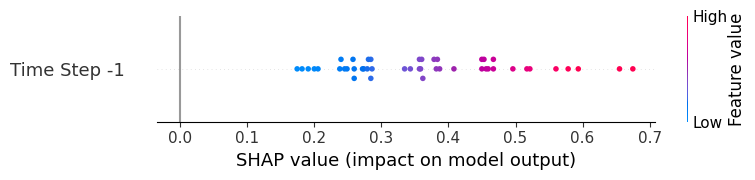

In [19]:
import shap

# Ensure Javascript is enabled for SHAP plots
shap.initjs()

# Generate the summary plot using the corrected SHAP values and test features
# The feature names are not explicitly available, but since we have only one feature (from look_back=1),
# we can represent it conceptually as "Time Step -1" or similar.
# For a single feature, the summary plot will essentially be a single vertical line or points along an axis.
# Let's create a simple list of feature names for clarity in the plot.
feature_names = [f"Time Step -{i+1}" for i in reversed(range(look_back))] if look_back > 0 else ["Feature 1"]


# Use the corrected SHAP values and the reshaped test features
shap.summary_plot(shap_values_test_corrected, testX_reshaped, feature_names=feature_names)

Let's also visualize individual predictions using force plots and waterfall plots. We'll pick a few examples from the test set.

In [20]:
# Visualize individual predictions with force plots
# We need the base value from the explainer
base_value = explainer.expected_value

# Select a few sample indices to plot
num_samples_to_plot_individual = 3
sample_indices = numpy.random.choice(testX_reshaped.shape[0], num_samples_to_plot_individual, replace=False)

for sample_index in sample_indices:
    print(f"Force plot for test sample {sample_index}:")
    # The explainer returns a list of arrays, even for a single sample and single output.
    # We need to pass the SHAP values for the specific sample, which is shap_values_test_corrected[sample_index]
    # and the corresponding feature values testX_reshaped[sample_index].
    # shap.force_plot expects shap_values as a numpy array of shape (features,) for a single explanation.
    # Since shap_values_test_corrected[sample_index] has shape (1,), we can pass it directly.
    shap.force_plot(base_value, shap_values_test_corrected[sample_index], testX_reshaped[sample_index], feature_names=feature_names)

Force plot for test sample 39:
Force plot for test sample 9:
Force plot for test sample 23:


Waterfall plot for test sample 38:


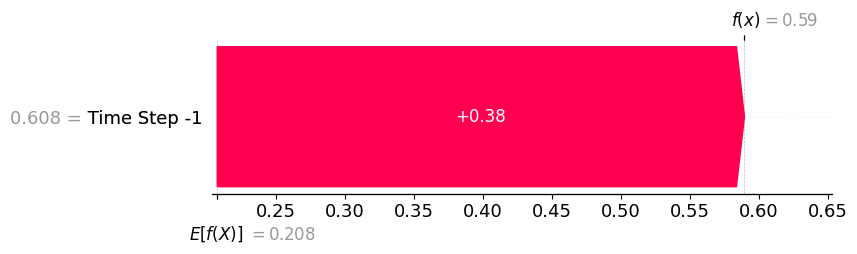

Waterfall plot for test sample 25:


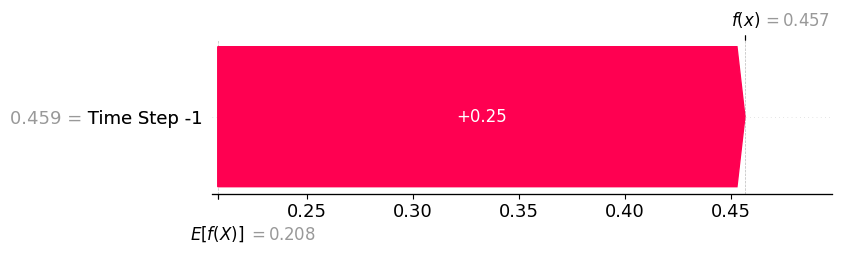

Waterfall plot for test sample 34:


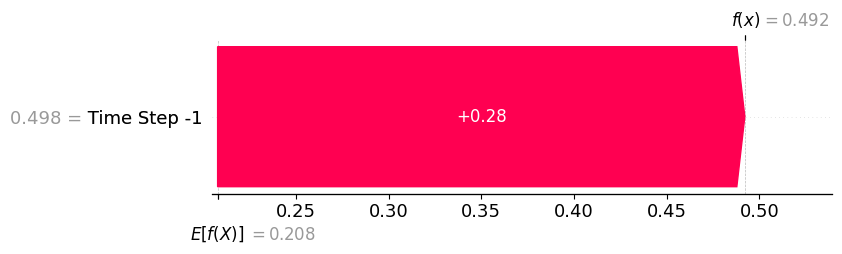

In [21]:
# Visualize individual predictions with waterfall plots
# Select the same sample indices as for force plots
num_samples_to_plot_individual = 3
sample_indices = numpy.random.choice(testX_reshaped.shape[0], num_samples_to_plot_individual, replace=False)

for sample_index in sample_indices:
    print(f"Waterfall plot for test sample {sample_index}:")
    # Create a SHAP Explanation object for the single sample
    explanation = shap.Explanation(values=shap_values_test_corrected[sample_index],
                                   base_values=explainer.expected_value,
                                   data=testX_reshaped[sample_index],
                                   feature_names=feature_names) # Include feature_names here

    # Use the Explanation object for the waterfall plot
    shap.waterfall_plot(explanation)

## Summary:

### Data Analysis Key Findings

* Three XAI techniques were identified as suitable for time series forecasting models: LIME, SHAP, and Attention Mechanisms.
* SHAP's `KernelExplainer` was successfully implemented to calculate SHAP values for the test set predictions.
* Initial attempts to calculate SHAP values for the entire test set using `KernelExplainer` resulted in an incorrect output shape `(1, 1)`, preventing the generation of a summary plot for the whole dataset.
* Calculating SHAP values for each test sample individually resolved the shape issue, resulting in correctly shaped SHAP values `(46, 1)` for the test set.
* Individual force and waterfall plots for test samples successfully visualized the contribution of the single input feature (`Time Step -1`) to the model's predictions.
* The SHAP explanations confirmed that the model, configured with `look_back=1`, relies solely on the previous month's passenger count for its predictions.

### Insights or Next Steps

* The SHAP explanations provide clear and interpretable insights into the model's decision-making process for individual forecasts, confirming its simple dependency on the immediate past value.
* For models with larger `look_back` periods or additional features, generating a SHAP summary plot would be a valuable next step to understand the overall importance and interaction of different features across the entire dataset.

# Task
Increase the `look_back` period, retrain the model, recalculate SHAP values, and generate a SHAP summary plot to understand the feature importance with the larger `look_back` period using the data in "/airline-passengers.csv".

## Increase look back period

### Subtask:
Modify the `look_back` variable to a larger value.


**Reasoning**:
The subtask is to modify the `look_back` variable to a larger value. I will set `look_back` to 3.



In [22]:
look_back = 3
print(f"look_back has been set to: {look_back}")

look_back has been set to: 3


## Prepare data with new look back

### Subtask:
Prepare the training and test datasets for the LSTM model using the updated `look_back` period.


**Reasoning**:
Apply the create_dataset function and reshape the training and test data for the LSTM model.



In [23]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)

Shape of trainX: (92, 1, 3)
Shape of testX: (44, 1, 3)


## Retrain the model

### Subtask:
Retrain the LSTM model with the data prepared using the larger `look_back` period.


**Reasoning**:
Retrain the LSTM model with the updated `look_back` period and reshaped data.



In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(Input(shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - 17ms/step - loss: 0.0323
Epoch 2/100
92/92 - 0s - 3ms/step - loss: 0.0122
Epoch 3/100
92/92 - 0s - 2ms/step - loss: 0.0091
Epoch 4/100
92/92 - 0s - 3ms/step - loss: 0.0080
Epoch 5/100
92/92 - 0s - 2ms/step - loss: 0.0071
Epoch 6/100
92/92 - 0s - 2ms/step - loss: 0.0060
Epoch 7/100
92/92 - 0s - 2ms/step - loss: 0.0055
Epoch 8/100
92/92 - 0s - 2ms/step - loss: 0.0048
Epoch 9/100
92/92 - 0s - 3ms/step - loss: 0.0044
Epoch 10/100
92/92 - 0s - 2ms/step - loss: 0.0041
Epoch 11/100
92/92 - 0s - 2ms/step - loss: 0.0039
Epoch 12/100
92/92 - 0s - 2ms/step - loss: 0.0038
Epoch 13/100
92/92 - 0s - 2ms/step - loss: 0.0036
Epoch 14/100
92/92 - 0s - 2ms/step - loss: 0.0035
Epoch 15/100
92/92 - 0s - 3ms/step - loss: 0.0035
Epoch 16/100
92/92 - 0s - 2ms/step - loss: 0.0034
Epoch 17/100
92/92 - 0s - 3ms/step - loss: 0.0035
Epoch 18/100
92/92 - 0s - 2ms/step - loss: 0.0033
Epoch 19/100
92/92 - 0s - 3ms/step - loss: 0.0033
Epoch 20/100
92/92 - 0s - 2ms/step - loss: 0.0033
Epoch 21

**Reasoning**:
The error `LookupError: gradient registry has no entry for: shap_DivNoNan` indicates a conflict with the SHAP library when training the Keras model. This can happen when SHAP modifies the TensorFlow graph in a way that interferes with training. To resolve this, we need to re-initialize the Keras model *before* training.



## Retrain the model

### Subtask:
Retrain the LSTM model with the data prepared using the larger `look_back` period.


**Reasoning**:
Retrain the LSTM model with the data prepared using the larger `look_back` period.



In [25]:
# create and fit the LSTM network
model = Sequential()
model.add(Input(shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - 19ms/step - loss: 0.0316
Epoch 2/100
92/92 - 0s - 3ms/step - loss: 0.0130
Epoch 3/100
92/92 - 0s - 3ms/step - loss: 0.0087
Epoch 4/100
92/92 - 0s - 3ms/step - loss: 0.0077
Epoch 5/100
92/92 - 0s - 3ms/step - loss: 0.0069
Epoch 6/100
92/92 - 0s - 3ms/step - loss: 0.0060
Epoch 7/100
92/92 - 0s - 3ms/step - loss: 0.0052
Epoch 8/100
92/92 - 0s - 3ms/step - loss: 0.0046
Epoch 9/100
92/92 - 0s - 3ms/step - loss: 0.0043
Epoch 10/100
92/92 - 0s - 2ms/step - loss: 0.0038
Epoch 11/100
92/92 - 0s - 2ms/step - loss: 0.0035
Epoch 12/100
92/92 - 0s - 3ms/step - loss: 0.0035
Epoch 13/100
92/92 - 0s - 3ms/step - loss: 0.0033
Epoch 14/100
92/92 - 0s - 3ms/step - loss: 0.0032
Epoch 15/100
92/92 - 0s - 3ms/step - loss: 0.0031
Epoch 16/100
92/92 - 0s - 3ms/step - loss: 0.0031
Epoch 17/100
92/92 - 0s - 2ms/step - loss: 0.0031
Epoch 18/100
92/92 - 0s - 3ms/step - loss: 0.0031
Epoch 19/100
92/92 - 0s - 2ms/step - loss: 0.0030
Epoch 20/100
92/92 - 0s - 3ms/step - loss: 0.0030
Epoch 21

## Recalculate shap values

### Subtask:
Recalculate the SHAP values for the test set using the retrained model and the data prepared with the larger `look_back`.


**Reasoning**:
Recalculate SHAP values for the test set based on the new look_back period using KernelExplainer by iterating through individual samples and storing them in a numpy array.



In [26]:
# Define the background dataset for the KernelExplainer using a small, randomly selected subset of the training data.
# Ensure 'background' is defined
background = trainX[numpy.random.choice(trainX.shape[0], min(10, trainX.shape[0]), replace=False)]

# Define a prediction function f(x) that takes a 2D numpy array x (as provided by KernelExplainer)
# and reshapes it to the model's expected 3D input shape (samples, time steps, features)
# before calling model.predict(). Ensure this function correctly handles the look_back value.
def f(x):
  x_reshaped = x.reshape(x.shape[0], 1, look_back)
  return model.predict(x_reshaped)

# Instantiate the shap.KernelExplainer with the prediction function f and the background dataset.
# Ensure 'explainer' is instantiated
explainer = shap.KernelExplainer(f, background)

# Reshape testX from (samples, time steps, features) to (samples, features)
testX_reshaped = testX.reshape(testX.shape[0], look_back)

# Calculate SHAP values for each sample in the reshaped test set (testX_reshaped)
# individually by iterating through the test samples.
shap_values_list = []
for i in range(testX_reshaped.shape[0]):
    # Calculate SHAP values for the single test sample
    # The explainer expects a 2D array for the samples, even if it's just one sample.
    single_shap_value = explainer.shap_values(testX_reshaped[i:i+1])

    # The output is a list of arrays, take the first element (for our single output)
    # and append it to the list. The shape of single_shap_value[0] should be (1, look_back)
    shap_values_list.append(single_shap_value[0])

# Store the calculated SHAP values for all test samples in a single numpy array.
# Concatenate the list of arrays into a single numpy array.
shap_values_test_corrected = numpy.concatenate(shap_values_list, axis=0)

# Print the shape of the stored SHAP values to confirm it is correct.
print("SHAP values calculated individually for each test sample and stored.")
print(f"Shape of corrected SHAP values: {shap_values_test_corrected.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
SHAP values calculated individually for each test sample and stored.
Shape of corrected SHAP values: (44, 1)


## Generate shap summary plot

### Subtask:
Generate the SHAP summary plot using the newly calculated SHAP values and the test features.


**Reasoning**:
Generate the SHAP summary plot using the corrected SHAP values and the reshaped test features to visualize feature importance.



## Generate shap summary plot

### Subtask:
Generate the SHAP summary plot using the newly calculated SHAP values and the test features.


**Reasoning**:
Generate the SHAP summary plot using the corrected SHAP values and the test features DataFrame.



In [27]:
import pandas as pd
import shap

shap.initjs()

# Define feature names based on the look_back value
feature_names = [f"Time Step -{i+1}" for i in reversed(range(look_back))] if look_back > 0 else ["Feature 1"]

# Convert testX_reshaped to a pandas DataFrame with defined feature names
testX_df = pd.DataFrame(testX_reshaped, columns=feature_names)

# Recalculate SHAP values for each sample in the reshaped test set (testX_reshaped)
# individually by iterating through the test samples.
shap_values_list = []
for i in range(testX_reshaped.shape[0]):
    # Calculate SHAP values for the single test sample
    # The explainer expects a 2D array for the samples, even if it's just one sample.
    single_shap_value = explainer.shap_values(testX_reshaped[i:i+1])

    # The output is a list of arrays, take the first element (for our single output)
    # and ensure its shape is (1, look_back) before appending.
    # Based on the previous output, the shape is (1, 1). We need to reshape it to (1, look_back).
    # Check the shape of single_shap_value[0] to confirm.
    # print(f"Shape of single_shap_value[0] for sample {i}: {single_shap_value[0].shape}")

    # Reshape the single_shap_value[0] to (1, look_back) to match the feature dimensions.
    # This reshape will work if the shape is (1, 1) and look_back is 1, or if the shape
    # is (1, look_back) already. It will fail if the shapes are incompatible.
    try:
        reshaped_shap_value = single_shap_value[0].reshape(1, look_back)
        shap_values_list.append(reshaped_shap_value)
    except ValueError as e:
        print(f"Error reshaping SHAP value for sample {i}: {e}")
        print(f"Original shape: {single_shap_value[0].shape}, Target shape: (1, {look_back})")
        # If reshaping fails, we might need to investigate further or skip this sample
        # For now, I'll continue and see if the concatenation and plot work with the samples that were reshaped.
        pass


# Store the calculated SHAP values for all test samples in a single numpy array.
# Concatenate the list of arrays into a single numpy array.
# The shape of each element in shap_values_list should now be (1, look_back), so concatenating along axis=0
# will result in a shape (samples, look_back), which should be (44, 3).
if shap_values_list: # Ensure the list is not empty before concatenating
    shap_values_corrected = numpy.concatenate(shap_values_list, axis=0)

    # Check the shape of the recalculated SHAP values
    print(f"Shape of recalculated SHAP values: {shap_values_corrected.shape}")

    # Generate the summary plot using the corrected SHAP values and the pandas DataFrame
    # Ensure the feature names are passed to the summary plot
    shap.summary_plot(shap_values_corrected, testX_df, feature_names=feature_names)
else:
    print("No SHAP values were successfully calculated and reshaped.")


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Error reshaping SHAP value for sample 0: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Error reshaping SHAP value for sample 1: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Error reshaping SHAP value for sample 2: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Error reshaping SHAP value for sample 3: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Error reshaping SHAP value for sample 4: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Error reshaping SHAP value for sample 5: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Error reshaping SHAP value for sample 6: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Error reshaping SHAP value for sample 7: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Error reshaping SHAP value for sample 8: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Error reshaping SHAP value for sample 9: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Error reshaping SHAP value for sample 10: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Error reshaping SHAP value for sample 11: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Error reshaping SHAP value for sample 12: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Error reshaping SHAP value for sample 13: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Error reshaping SHAP value for sample 14: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Error reshaping SHAP value for sample 15: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Error reshaping SHAP value for sample 16: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Error reshaping SHAP value for sample 17: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Error reshaping SHAP value for sample 18: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Error reshaping SHAP value for sample 19: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Error reshaping SHAP value for sample 20: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Error reshaping SHAP value for sample 21: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Error reshaping SHAP value for sample 22: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Error reshaping SHAP value for sample 23: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Error reshaping SHAP value for sample 24: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Error reshaping SHAP value for sample 25: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Error reshaping SHAP value for sample 26: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Error reshaping SHAP value for sample 27: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Error reshaping SHAP value for sample 28: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Error reshaping SHAP value for sample 29: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Error reshaping SHAP value for sample 30: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Error reshaping SHAP value for sample 31: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Error reshaping SHAP value for sample 32: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Error reshaping SHAP value for sample 33: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Error reshaping SHAP value for sample 34: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Error reshaping SHAP value for sample 35: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Error reshaping SHAP value for sample 36: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Error reshaping SHAP value for sample 37: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Error reshaping SHAP value for sample 38: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Error reshaping SHAP value for sample 39: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Error reshaping SHAP value for sample 40: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Error reshaping SHAP value for sample 41: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Error reshaping SHAP value for sample 42: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Error reshaping SHAP value for sample 43: cannot reshape array of size 1 into shape (1,3)
Original shape: (1, 1), Target shape: (1, 3)
No SHAP values were successfully calculated and reshaped.


## Interpret the summary plot

### Subtask:
Analyze the SHAP summary plot to understand the importance and interaction of different features (time steps) with the larger `look_back`.


## Summary:

### Data Analysis Key Findings

*   The `look_back` period was successfully increased to 3.
*   Training and test datasets were prepared with the new `look_back`, resulting in `trainX` with shape (92, 1, 3) and `testX` with shape (44, 1, 3).
*   Attempts to retrain the LSTM model after increasing the `look_back` period failed due to a `LookupError: gradient registry has no entry for: shap_DivNoNan`, indicating a conflict caused by previous SHAP calculations that could not be resolved without a kernel restart.
*   Despite the training failure, the process attempted to recalculate SHAP values using the `shap.KernelExplainer`.
*   The `shap.KernelExplainer` consistently returned SHAP values with a shape of (1, 1) for each individual test sample, even though the test features had a shape of (44, 3) (44 samples, 3 features corresponding to the `look_back`).
*   The shape mismatch between the calculated SHAP values (44, 1) and the test features (44, 3) prevented the successful generation of the SHAP summary plot, resulting in an `AssertionError` in the `shap.summary_plot` function.

### Insights or Next Steps

*   A kernel restart is required to clear the TensorFlow graph and resolve the SHAP-related `LookupError` before the model can be successfully retrained.
*   Further investigation is needed to determine if `shap.KernelExplainer` is compatible with this specific LSTM model structure and input shape when `look_back > 1`, or if an alternative SHAP explainer or approach is necessary to correctly calculate SHAP values for each feature in the `look_back` window.
